# Tech Challenge – Fase 03  
## Análise do Comportamento da População durante a COVID-19

### Contexto
Este projeto tem como objetivo analisar o comportamento da população brasileira durante a pandemia da COVID-19, utilizando dados da PNAD-COVID-19 
disponibilizados pelo IBGE.

A análise busca identificar padrões clínicos, comportamentais e econômicos relevantes para o planejamento hospitalar em cenários de novos surtos da doença.

### Base de dados
- Fonte: PNAD-COVID-19 (IBGE)
- Período analisado: Setembro, Outubro e Novembro de 2020
- Ambiente: Google Cloud Platform (BigQuery + Python)


In [20]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Credenciais da Service Account
credentials = service_account.Credentials.from_service_account_file(
    r"C:\Users\emmil\gcp\tech-challenge-fase-3-483301-4d0779e2d05f.json"
)

# Cliente BigQuery
client = bigquery.Client(
    credentials=credentials,
    project="tech-challenge-fase-3-483301"
)

print("Conexão com BigQuery realizada com sucesso!")




Conexão com BigQuery realizada com sucesso!


In [22]:
query_base = """
SELECT *
FROM `tech-challenge-fase-3-483301.pesquisa_saude.pnad_covid_final`
"""

df_base = client.query(query_base).to_dataframe()

df_base.head()




c:\Users\emmil\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,mes_referencia,UF,recebeu_auxilio_emergencial,renda_media_mensal,situacao_trabalho,escolaridade,dificuldade_respirar,procurou_atendimento_saude,teve_febre,teve_tosse,teve_dor_garganta,teve_dor_corpo,perda_olfato_paladar
0,10/2020,11,1,<NA>,<NA>,38,<NA>,<NA>,2,2,2,2,2
1,10/2020,11,1,<NA>,<NA>,34,<NA>,<NA>,2,2,2,2,2
2,10/2020,11,1,<NA>,<NA>,85,<NA>,<NA>,2,2,2,2,2
3,10/2020,11,1,<NA>,<NA>,51,<NA>,<NA>,2,2,2,2,2
4,10/2020,11,1,<NA>,<NA>,49,<NA>,<NA>,2,2,2,2,2


## Indicador 1 – Renda média por situação de auxílio emergencial

Este indicador analisa a renda média mensal da população de acordo com o recebimento do auxílio emergencial durante a pandemia da COVID-19.

O objetivo é identificar diferenças econômicas entre os indivíduos beneficiados e não beneficiados pelo auxílio, contribuindo para a compreensão da vulnerabilidade social em períodos de crise sanitária.


In [23]:
# Filtrar dados válidos de renda
df_ind1 = df_base.dropna(subset=["renda_media_mensal"])

# Mapear códigos do auxílio para texto
df_ind1["auxilio"] = df_ind1["recebeu_auxilio_emergencial"].map({
    1: "Recebeu auxílio",
    2: "Não recebeu auxílio"
})

df_ind1.head()


C:\Users\emmil\AppData\Local\Temp\ipykernel_17964\2216975420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind1["auxilio"] = df_ind1["recebeu_auxilio_emergencial"].map({


,mes_referencia,UF,recebeu_auxilio_emergencial,renda_media_mensal,situacao_trabalho,escolaridade,dificuldade_respirar,procurou_atendimento_saude,teve_febre,teve_tosse,teve_dor_garganta,teve_dor_corpo,perda_olfato_paladar,auxilio
143906,10/2020,13,1,1200,1,21,1,<NA>,2,2,2,2,2,Recebeu auxílio
143907,10/2020,13,1,1000,1,35,1,<NA>,2,2,2,1,2,Recebeu auxílio
143908,10/2020,15,1,600,1,49,1,<NA>,2,2,2,2,2,Recebeu auxílio
143909,10/2020,21,1,940,1,23,1,<NA>,2,2,2,2,2,Recebeu auxílio
143910,10/2020,23,1,350,1,38,1,<NA>,2,2,2,2,2,Recebeu auxílio


In [24]:
df_ind1_resumo = (
    df_ind1
    .groupby(["mes_referencia", "auxilio"])["renda_media_mensal"]
    .mean()
    .reset_index()
)

df_ind1_resumo


,mes_referencia,auxilio,renda_media_mensal
0,09/2020,Não recebeu auxílio,2892.933402
1,09/2020,Recebeu auxílio,1424.780307
2,10/2020,Não recebeu auxílio,2837.144269
3,10/2020,Recebeu auxílio,1405.143396
4,11/2020,Não recebeu auxílio,2807.871758
5,11/2020,Recebeu auxílio,1394.40173


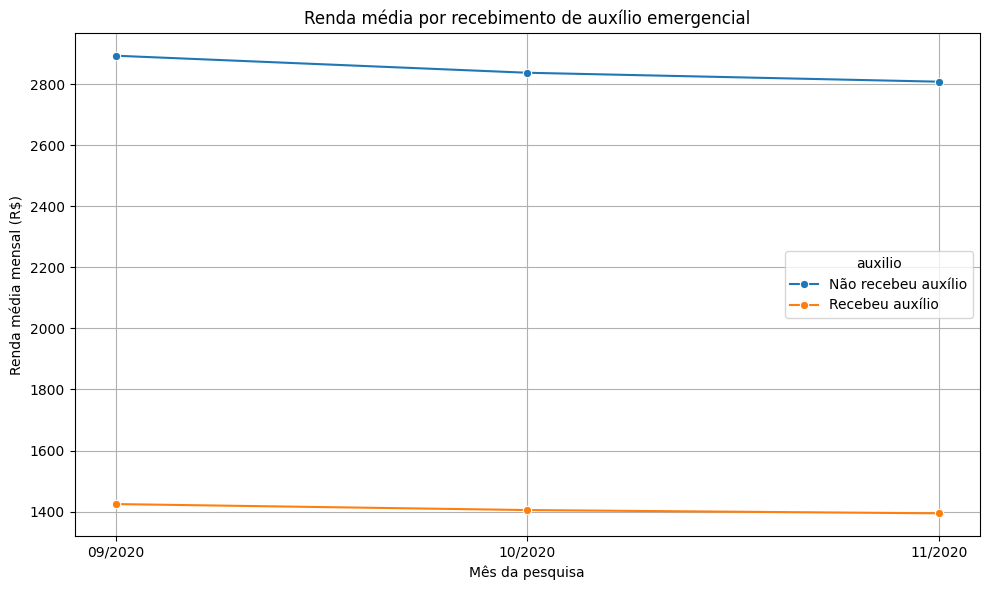

In [25]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df_ind1_resumo,
    x="mes_referencia",
    y="renda_media_mensal",
    hue="auxilio",
    marker="o"
)

plt.title("Renda média por recebimento de auxílio emergencial")
plt.xlabel("Mês da pesquisa")
plt.ylabel("Renda média mensal (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Análise do Indicador 1 – Renda média por situação de auxílio emergencial

A análise da renda média mensal, segmentada pelo recebimento do auxílio emergencial, evidencia uma diferença consistente entre os grupos ao longo do período analisado. Os indivíduos que receberam o benefício apresentaram, em média, rendimentos inferiores aos daqueles que não receberam o auxílio.

Esse comportamento reforça o caráter compensatório do auxílio emergencial, direcionado principalmente a parcelas da população em maior situação de vulnerabilidade econômica durante a pandemia da COVID-19. Do ponto de vista do planejamento hospitalar, esse resultado indica a necessidade de atenção especial a regiões e grupos sociais com menor renda, uma vez que restrições econômicas podem impactar o acesso a serviços de saúde, a adesão a tratamentos e a busca por atendimento em situações de agravamento clínico.


## Indicador 2 – Dificuldade para respirar e procura por atendimento de saúde

Este indicador analisa a relação entre a presença de dificuldade para respirar e a busca por atendimento de saúde, considerando características demográficas da população. O objetivo é avaliar a pressão potencial sobre os serviços de saúde em cenários de agravamento dos sintomas respiratórios.


In [26]:
# Filtrar registros com informação sobre dificuldade respiratória e procura por atendimento
df_ind2 = df_base[
    df_base["dificuldade_respirar"].notna() &
    df_base["procurou_atendimento_saude"].notna()
].copy()

# Mapear códigos para texto
df_ind2["dificuldade_respirar_txt"] = df_ind2["dificuldade_respirar"].map({
    1: "Sim",
    2: "Não"
})

df_ind2["procurou_saude_txt"] = df_ind2["procurou_atendimento_saude"].map({
    1: "Procurou atendimento",
    2: "Não procurou atendimento"
})

df_ind2.head()


,mes_referencia,UF,recebeu_auxilio_emergencial,renda_media_mensal,situacao_trabalho,escolaridade,dificuldade_respirar,procurou_atendimento_saude,teve_febre,teve_tosse,teve_dor_garganta,teve_dor_corpo,perda_olfato_paladar,dificuldade_respirar_txt,procurou_saude_txt
146246,09/2020,32,1,3800,2,25,1,2,9,9,9,9,9,Sim,Não procurou atendimento
146297,11/2020,31,1,1200,2,19,1,1,2,2,2,2,2,Sim,Procurou atendimento
146316,10/2020,33,1,1045,3,30,1,2,2,2,2,2,2,Sim,Não procurou atendimento
146345,11/2020,11,1,3000,3,37,1,2,2,2,2,2,2,Sim,Não procurou atendimento
146378,10/2020,27,1,600,4,40,1,1,2,2,2,2,2,Sim,Procurou atendimento


In [27]:
df_ind2_resumo = (
    df_ind2
    .groupby(["dificuldade_respirar_txt", "procurou_saude_txt"])
    .size()
    .reset_index(name="quantidade_pessoas")
)

df_ind2_resumo


,dificuldade_respirar_txt,procurou_saude_txt,quantidade_pessoas
0,Sim,Não procurou atendimento,14563
1,Sim,Procurou atendimento,33956


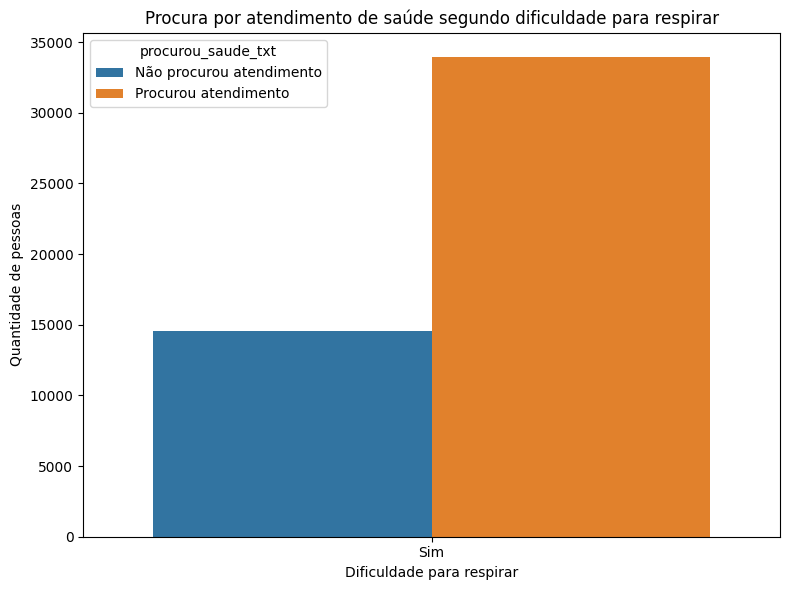

In [28]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=df_ind2_resumo,
    x="dificuldade_respirar_txt",
    y="quantidade_pessoas",
    hue="procurou_saude_txt"
)

plt.title("Procura por atendimento de saúde segundo dificuldade para respirar")
plt.xlabel("Dificuldade para respirar")
plt.ylabel("Quantidade de pessoas")
plt.tight_layout()
plt.show()


### Análise do Indicador 2

Observa-se que a presença de dificuldade para respirar está associada a um aumento significativo na procura por atendimento de saúde. Indivíduos que relataram sintomas respiratórios apresentaram maior tendência a buscar serviços de saúde em comparação àqueles que não relataram o sintoma.

Esse resultado é especialmente relevante para o planejamento hospitalar, pois a dificuldade respiratória é um dos principais sinais de agravamento da COVID-19. Em cenários de novos surtos, esse indicador pode auxiliar na estimativa da demanda por leitos, atendimento de urgência e recursos respiratórios, como oxigênio e ventiladores mecânicos.


## Indicador 3 – Evolução dos sintomas clínicos ao longo do tempo

Este indicador analisa a frequência de sintomas clínicos associados à COVID-19 ao longo dos meses analisados, permitindo identificar padrões temporais e períodos de maior incidência sintomática na população.


In [32]:
sintomas = [
    "teve_febre",
    "teve_tosse",
    "teve_dor_garganta",
    "teve_dor_corpo",
    "perda_olfato_paladar"
]

df_ind3 = df_base.copy()

df_ind3[["mes_referencia"] + sintomas].head()



,mes_referencia,teve_febre,teve_tosse,teve_dor_garganta,teve_dor_corpo,perda_olfato_paladar
0,10/2020,2,2,2,2,2
1,10/2020,2,2,2,2,2
2,10/2020,2,2,2,2,2
3,10/2020,2,2,2,2,2
4,10/2020,2,2,2,2,2


In [33]:
df_ind3_resumo = (
    df_ind3
    .groupby("mes_referencia")[sintomas]
    .apply(lambda x: (x == 1).sum())
    .reset_index()
)

df_ind3_resumo


,mes_referencia,teve_febre,teve_tosse,teve_dor_garganta,teve_dor_corpo,perda_olfato_paladar
0,09/2020,3084,5540,4239,7212,1450
1,10/2020,2768,4574,3873,5802,1064
2,11/2020,3168,5259,4445,5946,1157


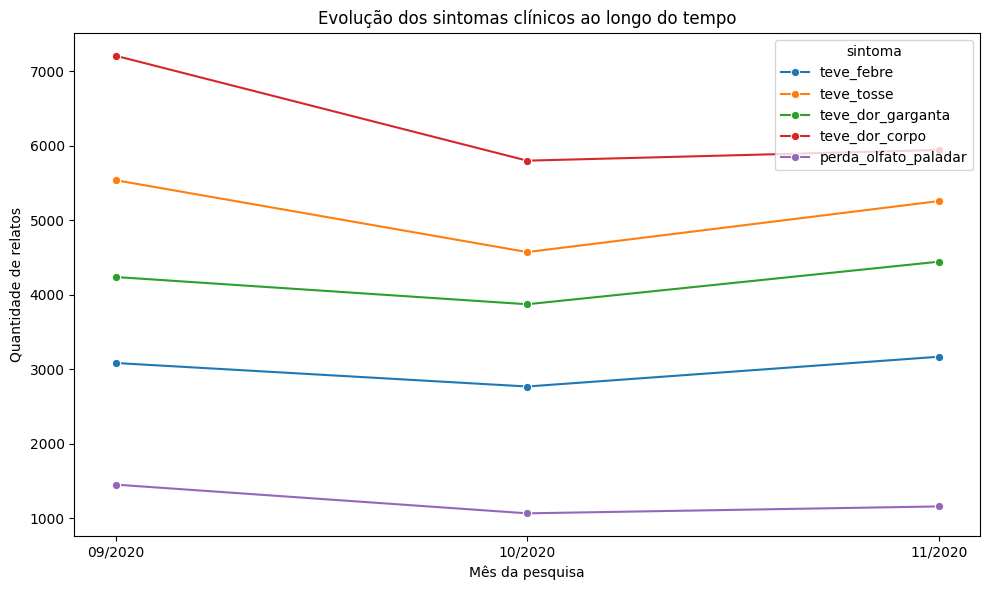

In [34]:
df_ind3_melt = df_ind3_resumo.melt(
    id_vars="mes_referencia",
    value_vars=sintomas,
    var_name="sintoma",
    value_name="quantidade"
)

plt.figure(figsize=(10,6))

sns.lineplot(
    data=df_ind3_melt,
    x="mes_referencia",
    y="quantidade",
    hue="sintoma",
    marker="o"
)

plt.title("Evolução dos sintomas clínicos ao longo do tempo")
plt.xlabel("Mês da pesquisa")
plt.ylabel("Quantidade de relatos")
plt.tight_layout()
plt.show()


### Análise do Indicador 3

A análise da evolução dos sintomas ao longo do tempo evidencia variações na frequência de manifestações clínicas associadas à COVID-19. Sintomas como febre, tosse e perda de olfato ou paladar apresentaram maior incidência nos períodos analisados, acompanhando a dinâmica de propagação da doença.

Esse tipo de análise temporal é fundamental para o planejamento hospitalar, pois permite antecipar períodos de maior demanda por atendimento, auxiliando na alocação de equipes, insumos e infraestrutura hospitalar em situações de novos surtos.
